### General Equations
$$T + S \xrightarrow{F} S^*$$
$$S^* \xrightarrow{A} S$$

$$\frac{d[T]}{dt} = - (k_1 + k_f [F])[S][T] $$
$$\frac{d[S]}{dt} = - (k_1 + k_f [F])[S][T] + (k_2+k_A [A])[S^*]$$

$$ \frac{d[S]}{dt} = -\frac{d[S*]}{dt}$$
$$ \implies S + S* = Const$$

### S steady state
Assume $\frac{d[S]}{dt}= 0$
$$(k_1 + k_f [F])[S][T]= (k_2+k_A [A])$$
$$\frac{d[T]}{dt} = - (k_1 + k_f [F])[S][T] $$
with solution:
$$ T(t) = [T_0] e^{-(k_1 + k_f [F])[S] t} $$
since $(k_1 + k_f [F])[S] = Const$

suspect 44a with no catalysts has S in steady state due to exponetial dependence.
![alt text](image-1.png)



## import data

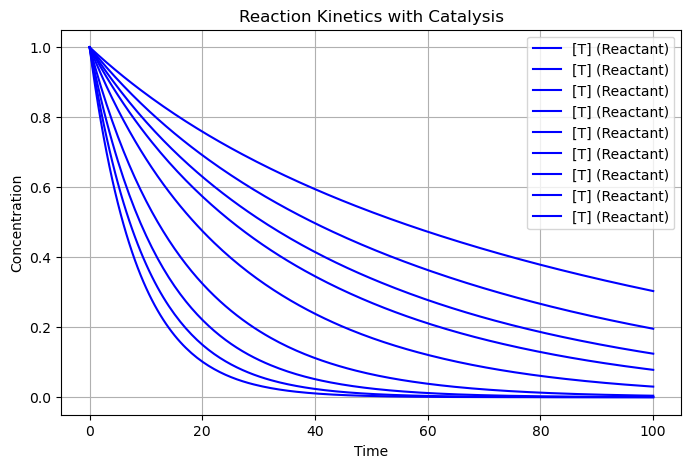

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define rate constants
k1_0 = 0.01  # Intrinsic rate for T + S -> S*
k1_c = 1.0  # Catalyzed rate for T + S -> S*
k2_0 = 0.01 # Intrinsic rate for S* -> S
k2_c = 1.0  # Catalyzed rate for S* -> S

# Initial concentrations
T0 = 1.0    # Initial concentration of T
S0 = 2.0    # Initial concentration of S
S_star0 = 0.0  # Initial concentration of S*
F = 0.       # Catalyst concentration for first reaction
A = 0.      # Catalyst concentration for second reaction

concs = np.array([12,	10,	8,	6,	4	,3,	2.5,	2,1.5])
results = []
Tinitial = [1]
# Solve the system
plt.figure(figsize=(8, 5))
for i, conc in enumerate(concs):
    S0 = conc
    T0 = Tinitial[0]
    def reaction_system(t, y):
        T, S, S_star = y
        
        # Reaction rates including both intrinsic and catalyzed contributions
        rate1 = (k1_0 + k1_c * F) * T * S
        rate2 = (k2_0 + k2_c * A) * S_star
        
        # Differential equations
        dT_dt = -rate1
        dS_dt = -rate1 + rate2
        dS_star_dt = rate1 - rate2
        
        return [dT_dt, dS_dt, dS_star_dt]

    # Time span for simulation
    t_max = 100
    time_span = (0, t_max)
    time_eval = np.linspace(0, t_max, 200)


    sol = solve_ivp(reaction_system, time_span, [T0, S0, S_star0], t_eval=time_eval)
    results.append(sol)
    # Plot results
    
    plt.plot(sol.t, sol.y[0], label='[T] (Reactant)', color='blue')
    # plt.plot(sol.t, sol.y[1], label='[S] (Product)', color='green')
    # plt.plot(sol.t, sol.y[2], label='[S*] (Intermediate)', color='red')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend()
    plt.title('Reaction Kinetics with Catalysis')
    plt.grid()
plt.show()


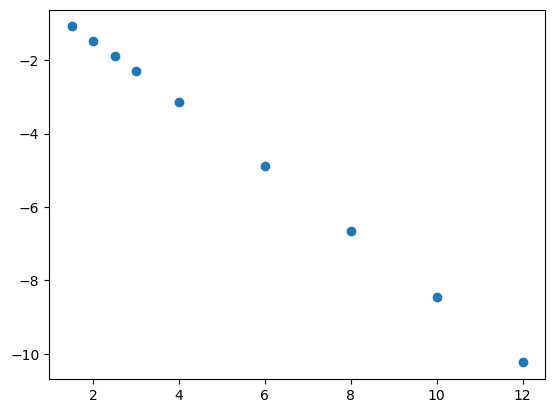

In [65]:
T_90 = []
for sol in results:
    T_90.append(np.interp(90, sol.t, sol.y[0]))
T_90 = np.array(T_90)  
plt.scatter(concs,np.log(T_90))

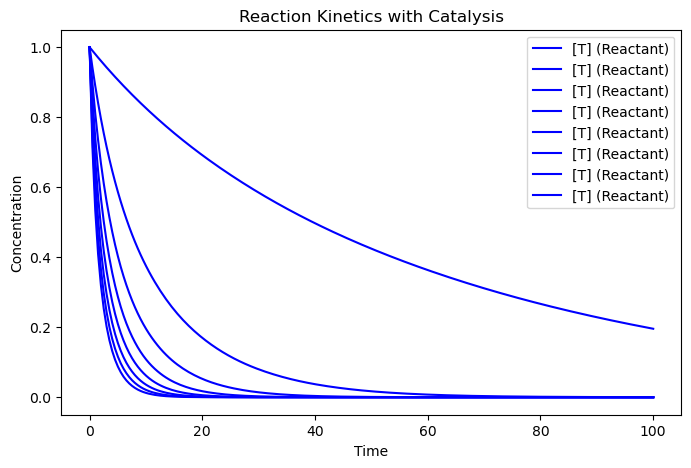

In [57]:
# Define rate constants
k1_0 = 0.01  # Intrinsic rate for T + S -> S*
k1_c = 1.0  # Catalyzed rate for T + S -> S*
k2_0 = 0.01 # Intrinsic rate for S* -> S
k2_c = 1.0  # Catalyzed rate for S* -> S

# Initial concentrations
T0 = 1.0    # Initial concentration of T
S0 = 2.0    # Initial concentration of S
S_star0 = 0.0  # Initial concentration of S*
F = 0.       # Catalyst concentration for first reaction
A = 0.      # Catalyst concentration for second reaction

concs = [2]
Faeconcs = np.array([0,	0.35,0.3,0.25,0.2,0.15,0.1,0.05])
results = []
Tinitial = [1]
# Solve the system
plt.figure(figsize=(8, 5))
for i, Faeconc in enumerate(Faeconcs):
    S0 = concs[0]
    T0 = Tinitial[0]
    F = Faeconc
    def reaction_system(t, y):
        T, S, S_star = y
        
        # Reaction rates including both intrinsic and catalyzed contributions
        rate1 = (k1_0 + k1_c * F) * T * S
        rate2 = (k2_0 + k2_c * A) * S_star
        
        # Differential equations
        dT_dt = -rate1
        dS_dt = -rate1 + rate2
        dS_star_dt = rate1 - rate2
        
        return [dT_dt, dS_dt, dS_star_dt]

    # Time span for simulation
    t_max = 100
    time_span = (0, t_max)
    time_eval = np.linspace(0, t_max, 200)


    sol = solve_ivp(reaction_system, time_span, [T0, S0, S_star0], t_eval=time_eval)
    results.append(sol)
    # Plot results
    
    plt.plot(sol.t, sol.y[0], label='[T] (Reactant)', color='blue')
    # plt.plot(sol.t, sol.y[1], label='[S] (Product)', color='green')
    # plt.plot(sol.t, sol.y[2], label='[S*] (Intermediate)', color='red')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend()
    plt.title('Reaction Kinetics with Catalysis')
    plt.grid()
plt.show()

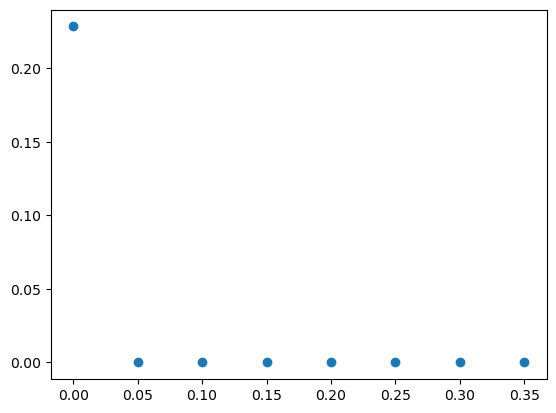

In [62]:
T_90 = []
for sol in results:
    T_90.append(np.interp(90, sol.t, sol.y[0]))
T_90 = np.array(T_90)  
plt.scatter(Faeconcs,(T_90))